# Stock Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit for stock analysis and prediction. It is built on the quandl library for financial data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. First, have to recommend against playing the stock market on a daily basis, with or without Stocker! Mostly I made this tool to gain more experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt
import sys
%matplotlib inline

## Import the Stocker Class

In [2]:
path_to_stocker = '/Users/robincole/Documents/Github/Data-Analysis/stocker'
sys.path.insert(0, path_to_stocker)

In [3]:
from stocker import Stocker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we simply need to pass the ticker to the stocker class and assign it to a variable. 

In [4]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-01-18.


The Stocker object has a number of attributes and methods we can use for analysis and prediction. The main ones we will use in this notebook are `Stocker.create_prophet_model, Stocker.changepoint_prior_analysis, Stocker.changepoint_prior_validation, Stocker.evaluate_prediction,` and `Stocker.predict_future`.

### Basic Plot of Stock History

We have a little over 20 years of Amazon price history. Let's see what that looks like in its entirety.

Maximum Adj. Close = 1305.20 on 2018-01-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1293.32.



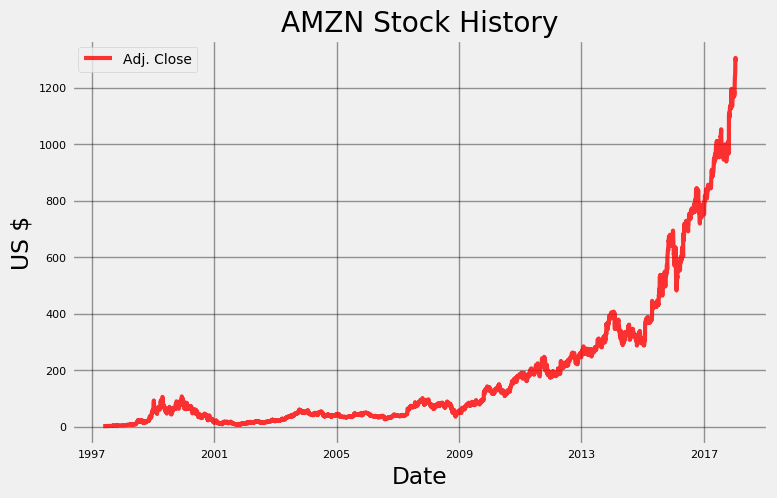

In [5]:
amazon.plot_stock()

### Plot of Daily Changes

Maximum Daily Change = 42.81 on 2017-10-27.
Minimum Daily Change = -49.57 on 2015-07-24.
Current Daily Change = -0.63.



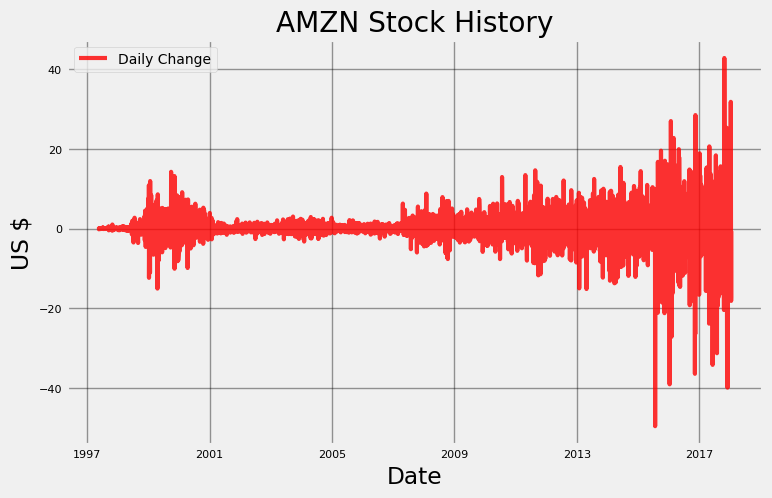

In [6]:
amazon.plot_stock(stats=['Daily Change'])

There have been some extreme changes recently although the price has also been increasing, so these changes are roughly the same in magnitude. We could change the plot to have percentage change from the average on the y-axis. There do not appear to be any trends with regards to the changes in one direction or the other over the history of Amazon. However, we know the stock has increased in value, so the overall average daily change must be slightly positive. 

## Create Model to Examine Trends

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data. 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


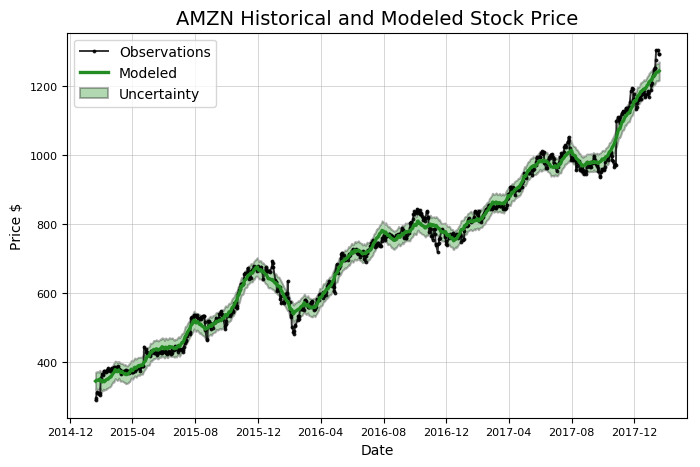

In [7]:
model, model_data = amazon.create_prophet_model()

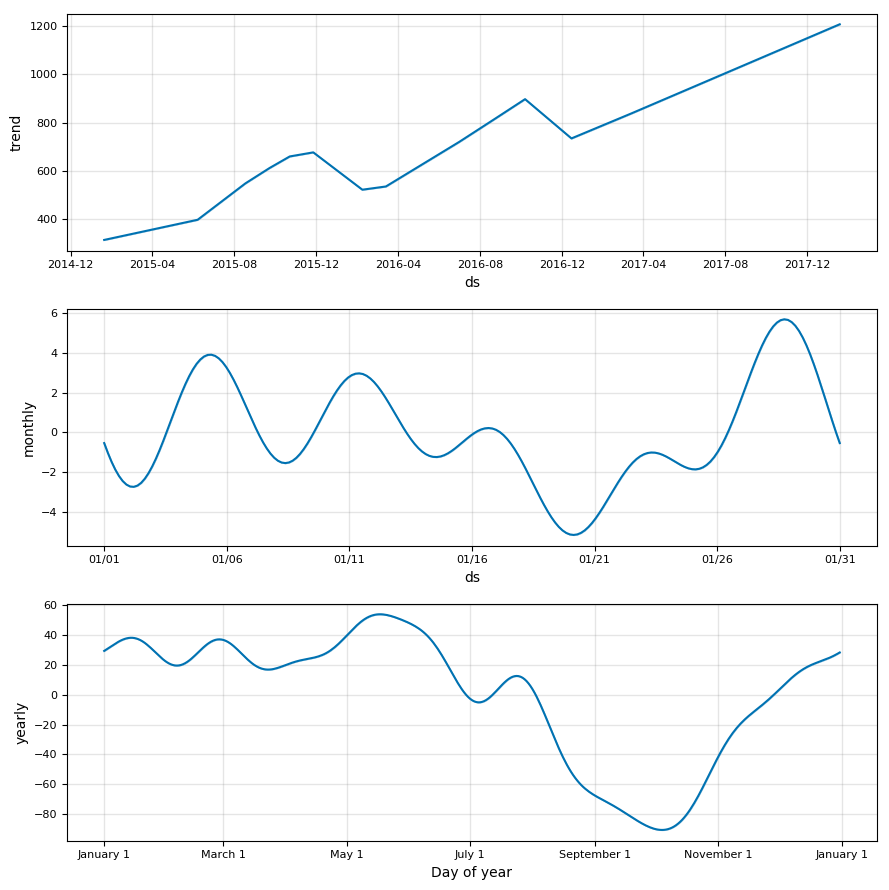

In [8]:
model.plot_components(model_data)
plt.show()

### Test a Weekly Component

Although it is unlikely, perhaps there is a significant weekly component that including would improve the model. Let's add it in and look at the pattern. 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


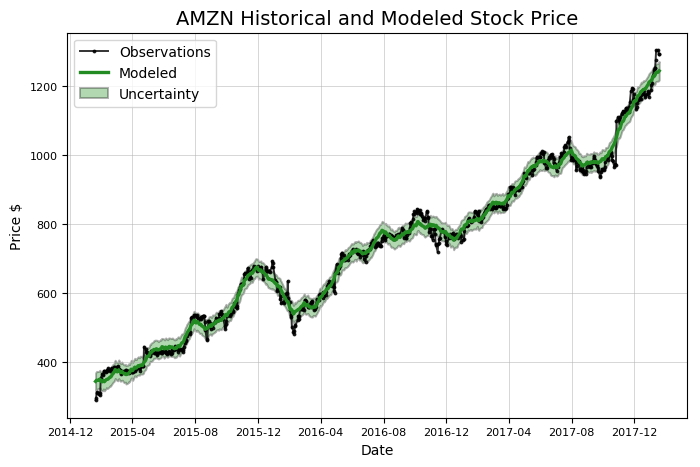

In [9]:
amazon.weekly_seasonality=True
model, model_data = amazon.create_prophet_model()

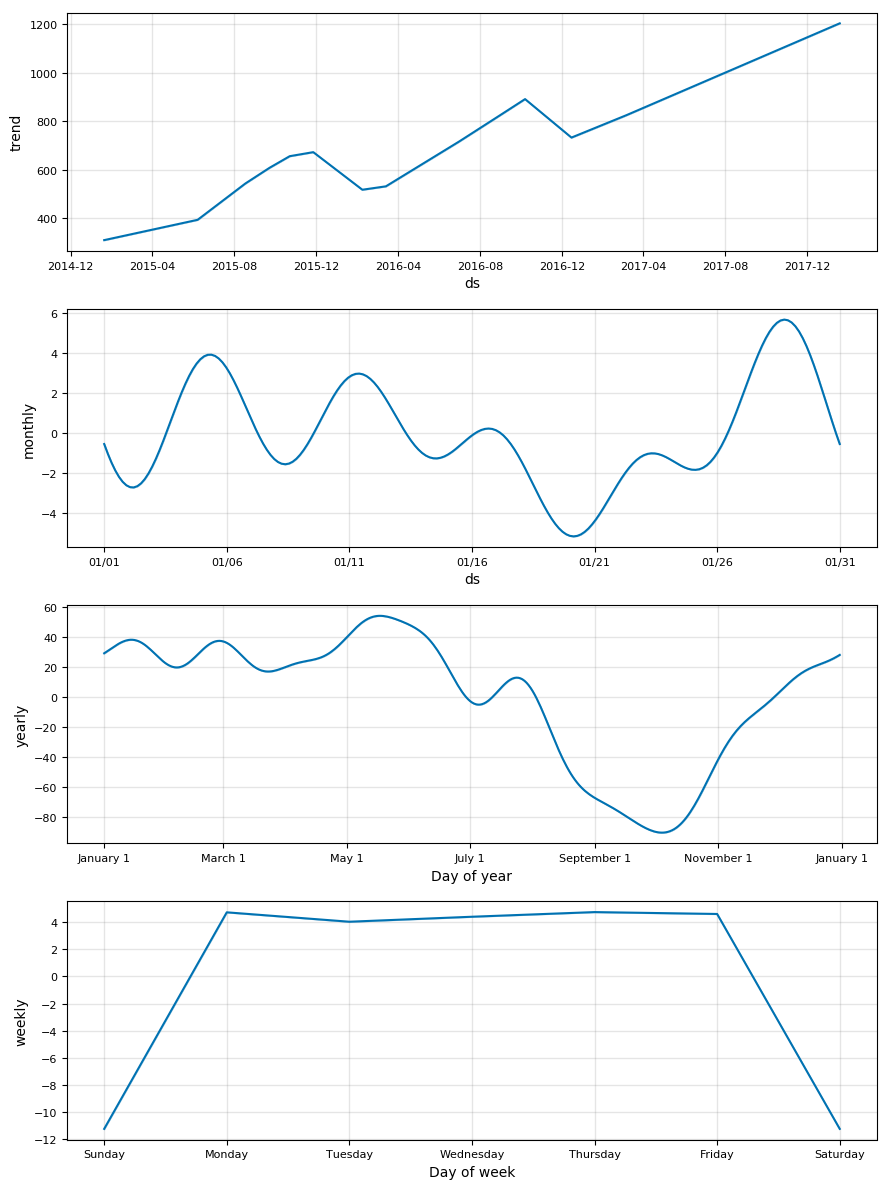

In [10]:
model.plot_components(model_data)

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [11]:
amazon.weekly_seasonality=False

# First Predictions

Let's quickly make a model for predicting the stock price for the next 3 months. 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predicted Price on 2018-04-18 = $1339.99


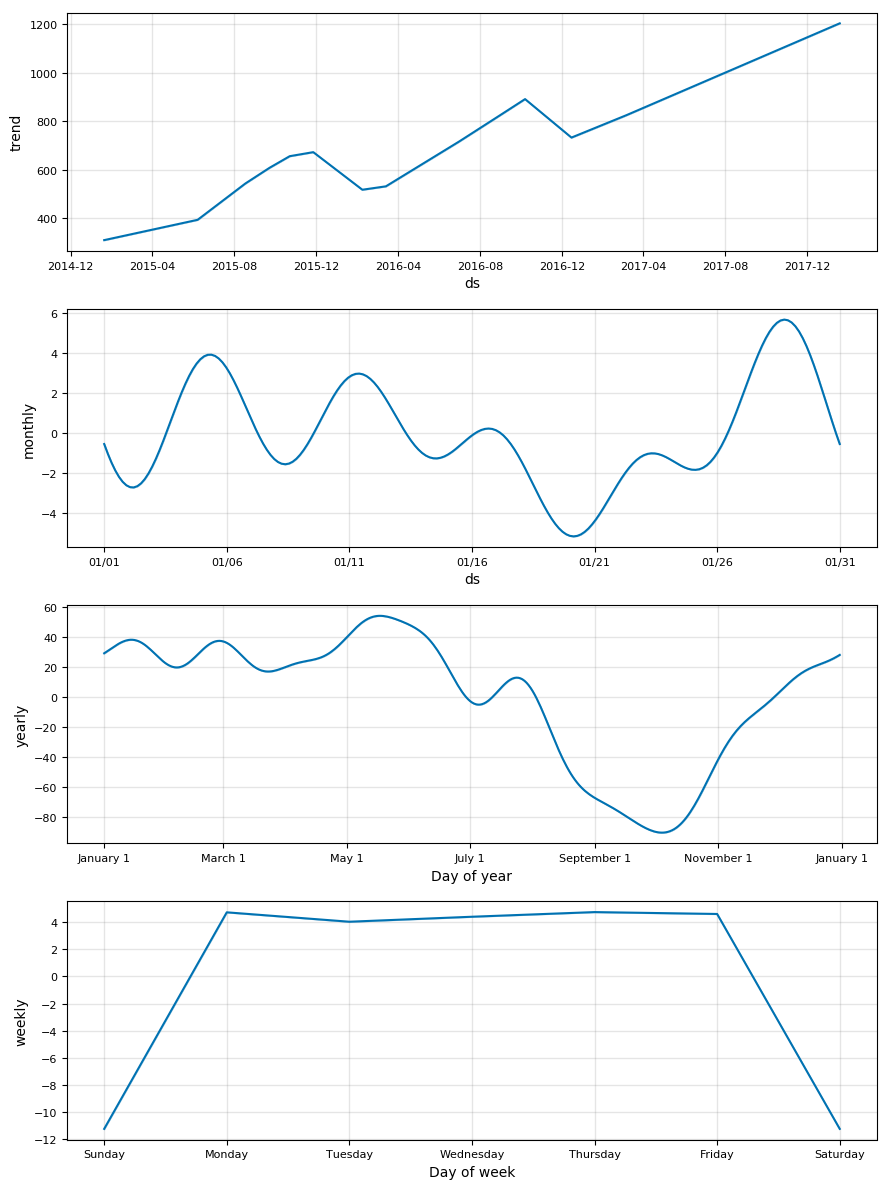

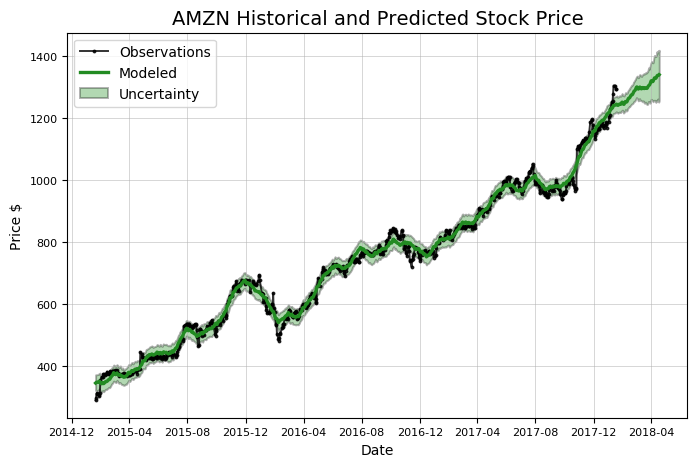

In [12]:
model, model_data = amazon.create_prophet_model(days=90)

# Evaluate Model

Anyone can make stock predictions by simply picking a number and calling that an estimate. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period. 

To put our predictions in perspective, we can find the average dollar error, the average range of uncertainty, the average time the price was in the uncertainty range, and the average number of times we predicted the correct direction. 

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/robincole/Documents/Github/Data-Analysis/stocker/stocker.py:459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in AMZN from 2017-01-18 to 2018-01-18 with 1000 shares.

Predicted price on 2018-01-17 = $818.02.
Actual price on    2018-01-17 = $1295.00.

When the model predicted an increase, the price increased 57.25% of the time.
When the model predicted a decrease, the price decreased  44.14% of the time.

The total profit using the Prophet model = $302380.00.
The Buy and Hold strategy profit =         $487520.00.

Thanks for playing the stock market!



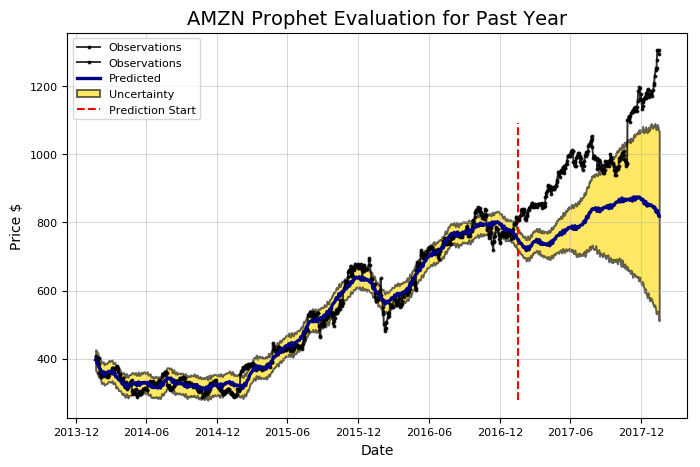

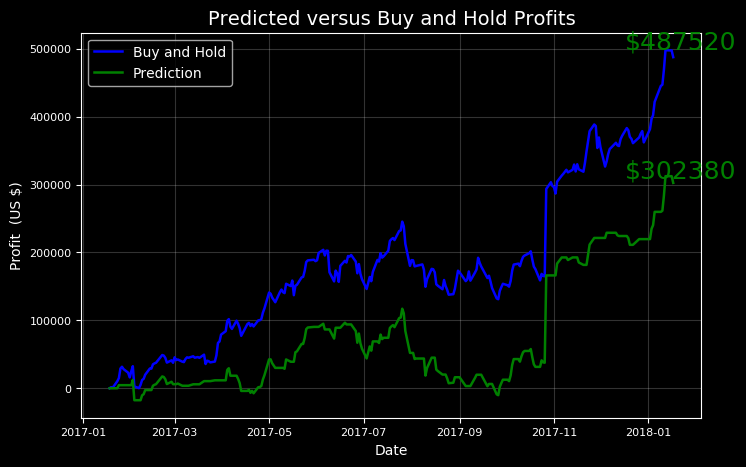

In [13]:
amazon.evaluate_prediction()

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with the default changepoint priors. 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


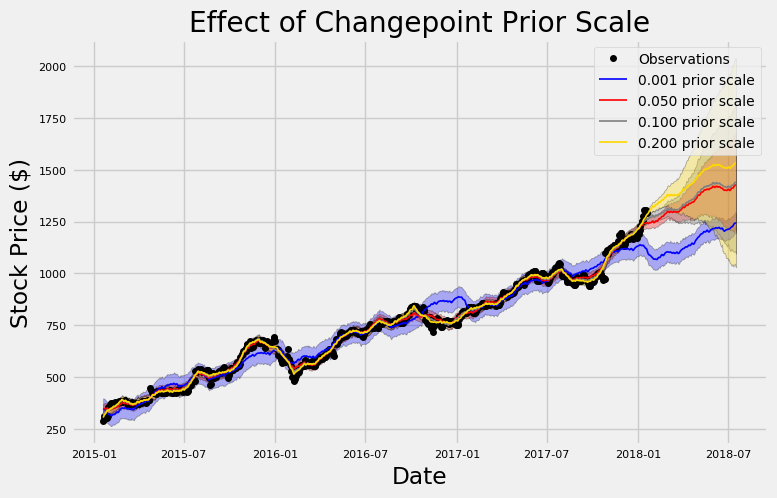

In [14]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


     cps  train_err  train_range    test_err  test_range
0  0.001  51.706761   170.197449  118.175647  170.225747
1  0.050  18.335045    60.153858  181.841518  231.248274
2  0.100  14.221470    47.032497   73.683743  495.855304
3  0.200  12.260552    41.041152   58.807611  838.174523


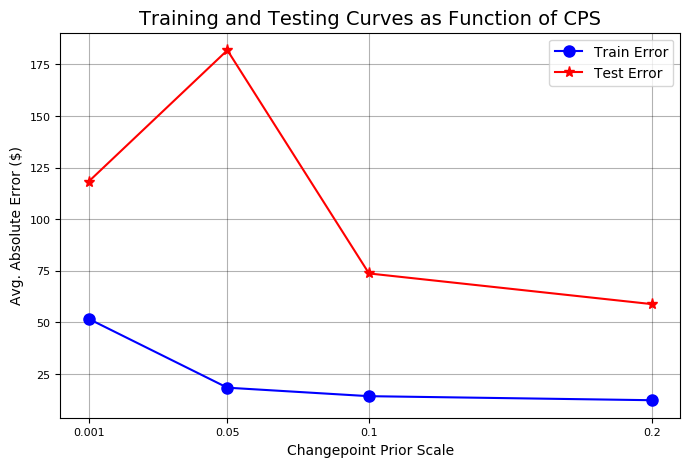

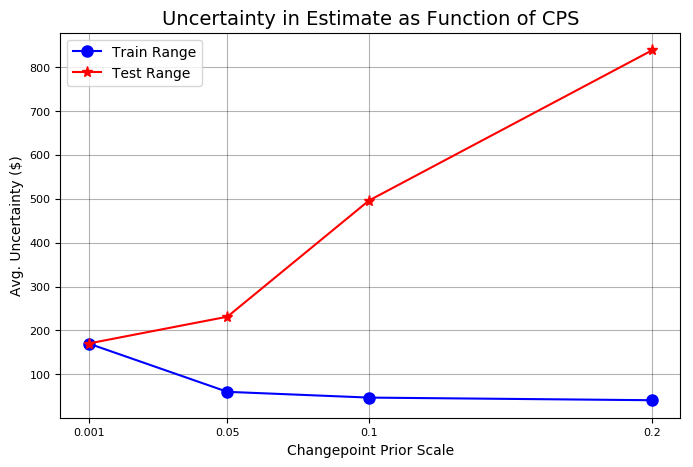

In [15]:
amazon.changepoint_prior_validation()

### Refine Search 

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


   cps  train_err  train_range    test_err   test_range
0  0.2  12.260552    41.039109   58.807611   861.526315
1  0.3  10.664677    36.328102   87.644212  1316.656725
2  0.4  10.344973    35.490091   96.873596  1474.071492
3  0.5  10.204725    35.158717  102.512791  1593.027926


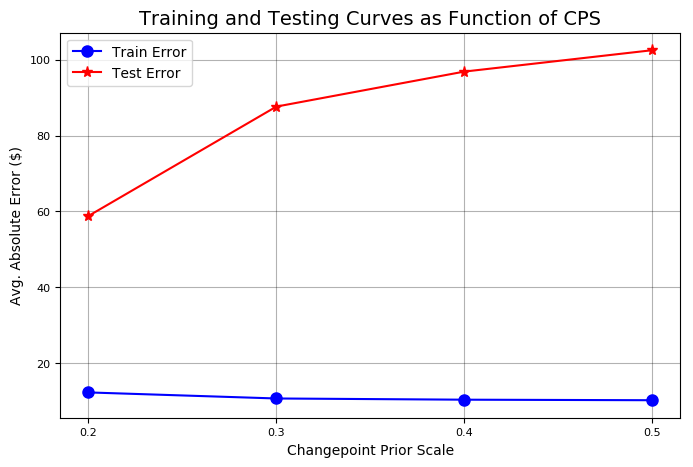

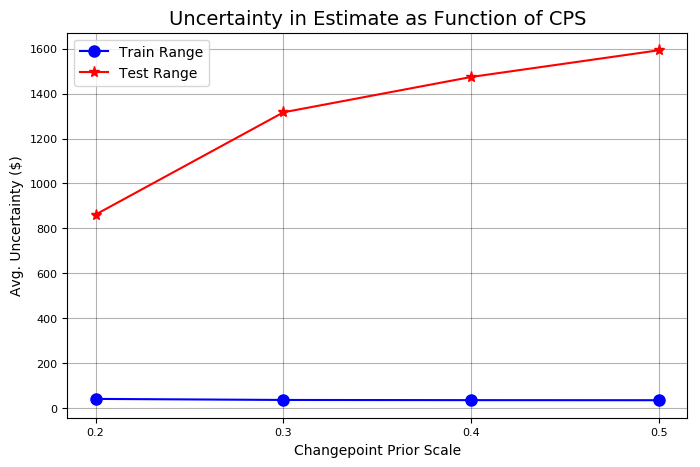

In [16]:
amazon.changepoint_prior_validation(changepoint_priors=[0.2, 0.3, 0.4, 0.5])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. 

In [17]:
amazon.changepoint_prior_scale = 0.2

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predicted Price on 2019-01-18 = $1810.45


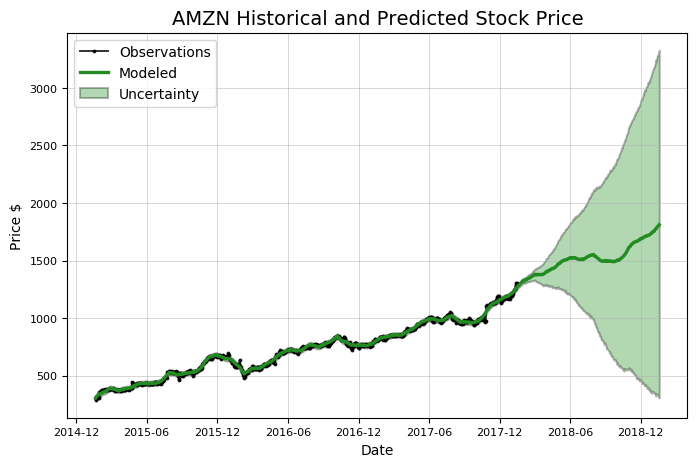

In [18]:
model, model_data = amazon.create_prophet_model(days=365)

# Evaluate Predictions

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/robincole/Documents/Github/Data-Analysis/stocker/stocker.py:459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in AMZN from 2017-01-18 to 2018-01-18 with 1000 shares.

Predicted price on 2018-01-17 = $1056.21.
Actual price on    2018-01-17 = $1295.00.

When the model predicted an increase, the price increased 57.86% of the time.
When the model predicted a decrease, the price decreased  45.56% of the time.

The total profit using the Prophet model = $319290.00.
The Buy and Hold strategy profit =         $487520.00.

Thanks for playing the stock market!



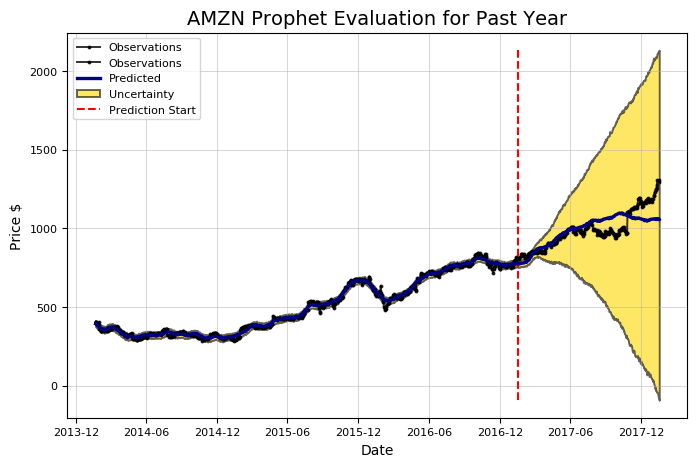

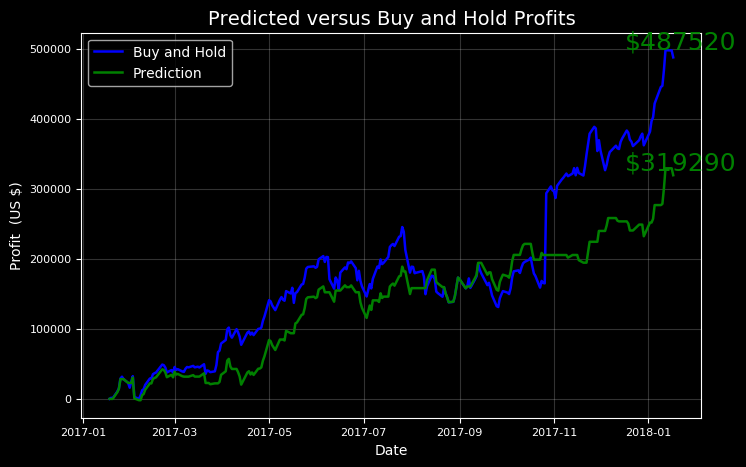

In [19]:
amazon.evaluate_prediction()

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Predicted Increase: 

         Date     estimate    change        upper        lower
1  2018-01-19  1284.408653  3.141074  1302.903159  1263.717916
3  2018-01-21  1288.431160  4.022507  1307.137870  1268.576895
4  2018-01-22  1292.496371  4.065211  1311.880575  1273.684570
5  2018-01-23  1297.850370  5.353999  1318.193393  1277.990259
6  2018-01-24  1302.617021  4.766651  1322.766267  1283.834141
7  2018-01-25  1305.485943  2.868922  1326.638988  1285.217361
8  2018-01-26  1307.093955  1.608012  1326.373578  1286.631393
10 2018-01-28  1313.807161  6.713207  1333.902581  1293.076057

Predicted Decrease: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []


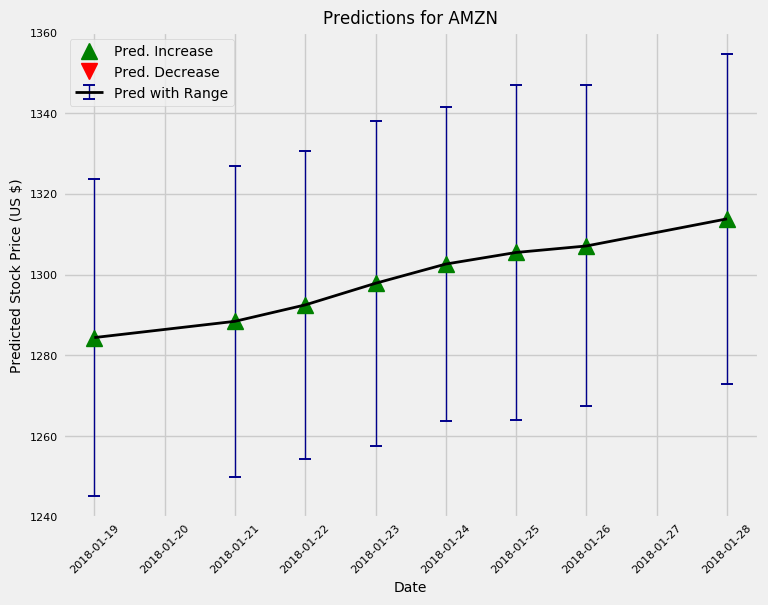

In [20]:
amazon.predict_future(days=10)

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Predicted Increase: 

         Date     estimate    change        upper        lower
1  2018-01-19  1284.408653  3.141074  1302.580689  1265.034947
3  2018-01-21  1288.431160  4.022507  1308.745225  1268.308002
4  2018-01-22  1292.496371  4.065211  1311.382238  1271.899167
5  2018-01-23  1297.850370  5.353999  1318.532041  1277.323668
6  2018-01-24  1302.617021  4.766651  1322.285471  1282.748905
7  2018-01-25  1305.485943  2.868922  1325.076026  1285.063697
8  2018-01-26  1307.093955  1.608012  1327.258205  1286.495039
10 2018-01-28  1313.807161  6.713207  1335.651653  1292.896595
11 2018-01-29  1319.300615  5.493453  1339.281192  1296.244569
12 2018-01-30  1323.403865  4.103250  1343.549514  1301.817733
13 2018-01-31  1324.268630  0.864765  1344.846698  1302.152569
17 2018-02-04  1325.933824  4.982029  1348.350060  1303.823023
18 2018-02-05  1330.406975  4.473151  1351.704786  1305.563581
19 2018-02-06  1332.955735  2.548760  1355.760048  1310.148442
20 2018-02-07  1333.079370  0.12

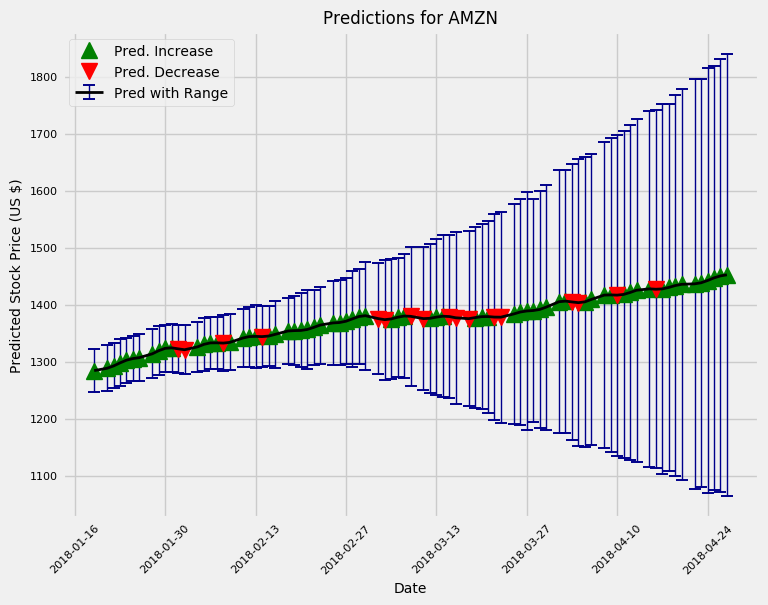

In [21]:
amazon.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasts have some uncertainty, and the next forecasts are made on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 